In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from joblib import Parallel, delayed

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from HDSIdent.data_treatment.data_preprocessing import Preprocessing
from HDSIdent.initial_intervals.exponential_weighted import ExponentialWeighted
from HDSIdent.initial_intervals.bandpass_filter import BandpassFilter
from HDSIdent.initial_intervals.non_parametric_pettitt import PettittMethod

### Read Data

#### NOTICE: this simulation data here presented was produced inspired in Exemple 3 of the following work:

<cite>WANG, J. et al. Searching historical data segments for process identification in feedback control loops. Computers and Chemical Engineering, v. 112, n. 6, p. 6–16, 2018.</cite>

In [4]:
u = pd.read_csv('siso_simu_u.csv',header=None)
sp = pd.read_csv('siso_simu_sp.csv',header=None)
y = pd.read_csv('siso_simu_y.csv',header=None)

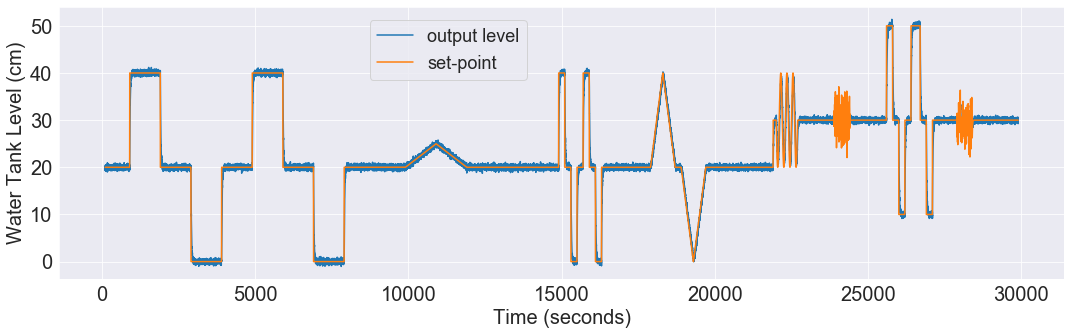

In [5]:
plt.figure(figsize=(18,5));
plt.plot(y[100:],label="output level");
plt.plot(sp[100:],label="set-point");
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.ylabel("Water Tank Level (cm)", fontsize=20);
plt.xlabel("Time (seconds)", fontsize=20);
plt.legend(fontsize=18,bbox_to_anchor=(0.3,0.7));

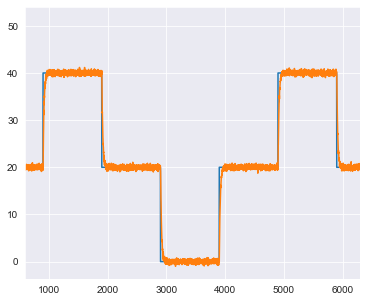

In [6]:
plt.figure(figsize=(6,5));
plt.plot(sp);
plt.plot(y);
plt.xlim(600,6300);

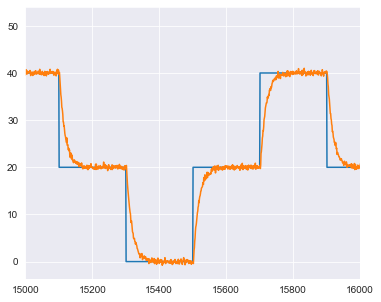

In [7]:
plt.figure(figsize=(6,5));
plt.plot(sp);
plt.plot(y);
plt.xlim(15000,16000);

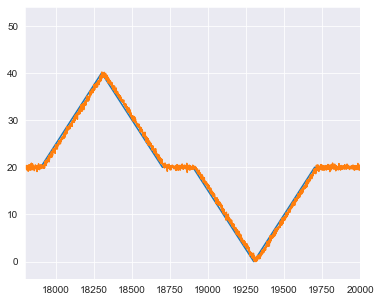

In [8]:
plt.figure(figsize=(6,5));
plt.plot(sp);
plt.plot(y);
plt.xlim(17800,20000);

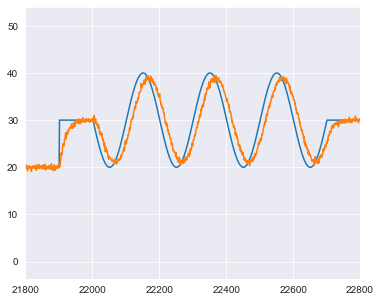

In [9]:
plt.figure(figsize=(6,5));
plt.plot(sp);
plt.plot(y);
plt.xlim(21800,22800);

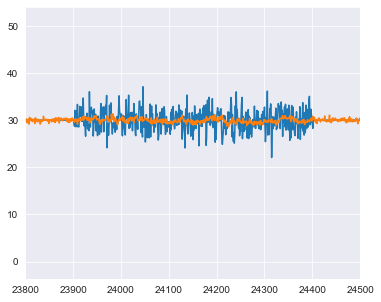

In [10]:
plt.figure(figsize=(6,5));
plt.plot(sp);
plt.plot(y);
plt.xlim(23800,24500);

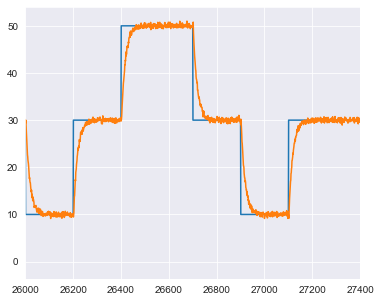

In [11]:
plt.figure(figsize=(6,5));
plt.plot(sp);
plt.plot(y);
plt.xlim(26000,27400);

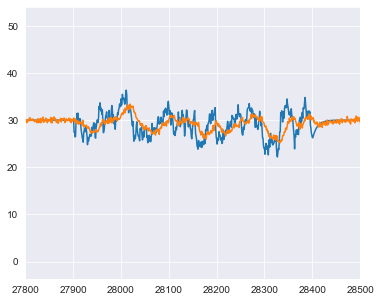

In [12]:
plt.figure(figsize=(6,5));
plt.plot(sp);
plt.plot(y);
plt.xlim(27800,28500);

### Data Pre-processing

In [13]:
pp = Preprocessing(
        scaler='MinMaxScaler',
        feature_range=(-0.5,0.5),
        k=100);

In [14]:
X_clean, Y_clean = pp.fit_transform(X=np.concatenate([u,sp],axis=1),
                                    y=y)

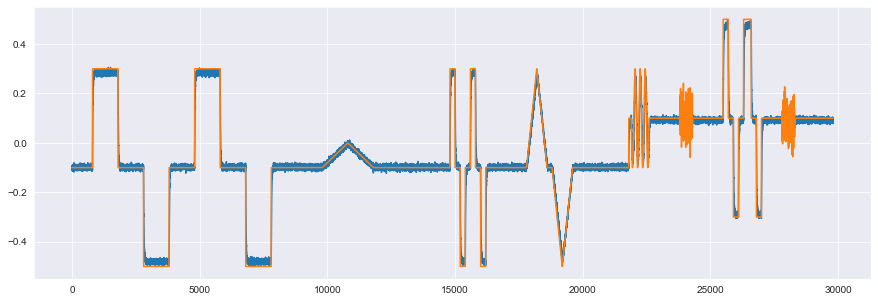

In [15]:
plt.figure(figsize=(15,5))
plt.plot(Y_clean);
plt.plot(X_clean[:,1]);

### Potential Intervals

#### 1) Exponential Weighted Filter

**Finding potential intervals with the Set-point and the Output Variable**

In [16]:
df = pd.DataFrame()
df['SP'] = np.squeeze(X_clean[:,1])
df['Y'] = np.squeeze(Y_clean)

**Verifying the effect of the Forgetting Factor**

In [17]:
forget_fact_arr = np.array([0.0005, 0.002, 0.005])

count = 0
S_plot_arr = []
mu_plot_arr = []
for fact in forget_fact_arr:
    count+=1
    print("Iteration {}/{}".format(count,len(forget_fact_arr)))
    EW = ExponentialWeighted(forgetting_fact_v = np.array([fact]*2),
                             forgetting_fact_u = np.array([fact]*2),
                             n_jobs=-1)
    EW.fit(X=df[['SP']],y=df[['Y']])
    S_plot_arr.append(EW._v_k_arr)
    mu_plot_arr.append(EW._mu_k_arr)

Iteration 1/3
Iteration 2/3
Iteration 3/3


#### Variance Filter

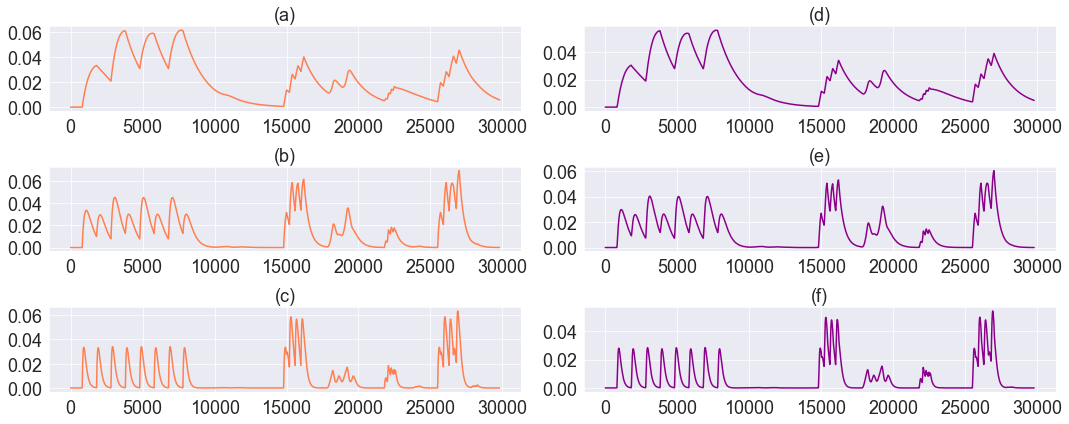

In [18]:
plt.figure(figsize=(15,6))

plt.subplot(3,2,1);
plt.plot(S_plot_arr[0][:,0], color='coral');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(a)", fontsize=18);

plt.subplot(3,2,2);
plt.plot(S_plot_arr[0][:,1], color='darkmagenta');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(d)", fontsize=18);

plt.subplot(3,2,3);
plt.plot(S_plot_arr[1][:,0], color='coral');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(b)", fontsize=18);

plt.subplot(3,2,4);
plt.plot(S_plot_arr[1][:,1], color='darkmagenta');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(e)", fontsize=18);

plt.subplot(3,2,5);
plt.plot(S_plot_arr[2][:,0], color='coral');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(c)", fontsize=18);

plt.subplot(3,2,6);
plt.plot(S_plot_arr[2][:,1], color='darkmagenta');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(f)", fontsize=18);
plt.tight_layout();

#### Average Filter

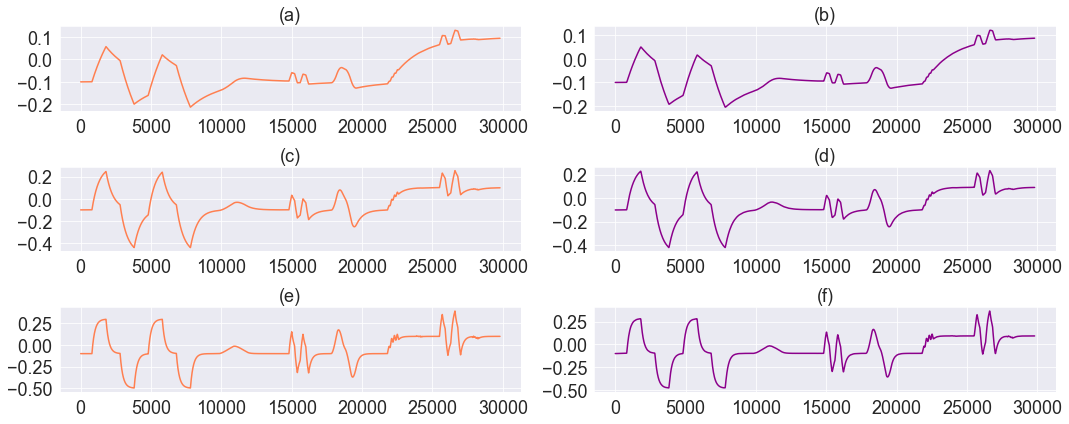

In [19]:
plt.figure(figsize=(15,6))

plt.subplot(3,2,1);
plt.plot(mu_plot_arr[0][:,0], color='coral');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(a)", fontsize=18);

plt.subplot(3,2,2);
plt.plot(mu_plot_arr[0][:,1], color='darkmagenta');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(b)", fontsize=18);

plt.subplot(3,2,3);
plt.plot(mu_plot_arr[1][:,0], color='coral');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(c)", fontsize=18);

plt.subplot(3,2,4);
plt.plot(mu_plot_arr[1][:,1], color='darkmagenta');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(d)", fontsize=18);

plt.subplot(3,2,5);
plt.plot(mu_plot_arr[2][:,0], color='coral');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(e)", fontsize=18);

plt.subplot(3,2,6);
plt.plot(mu_plot_arr[2][:,1], color='darkmagenta');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.title("(f)", fontsize=18);

plt.tight_layout();

**Choosing Parameters**

In [153]:
EW = ExponentialWeighted(forgetting_fact_v = np.array([0.005,0.005]),
                         forgetting_fact_u = np.array([0.005,0.005]),
                         H_v = [0.004,0.004],
                         verbose=0,
                         n_jobs=-1)

In [155]:
start = time()
EW.fit(X=df[['SP']],y=df[['Y']]);
end = time()

In [156]:
print("Execution time: {}".format(end-start))

Execution time: 5.141324996948242


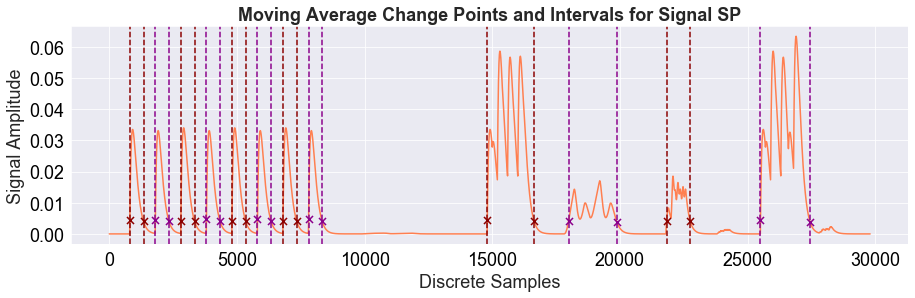

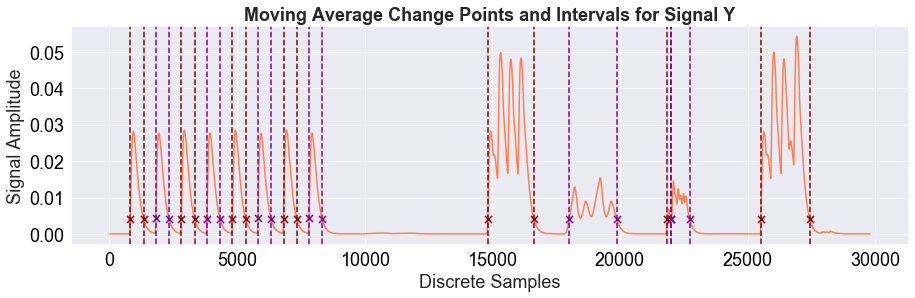

In [22]:
EW.plot_change_points(X=df[['SP']],y=df[['Y']])

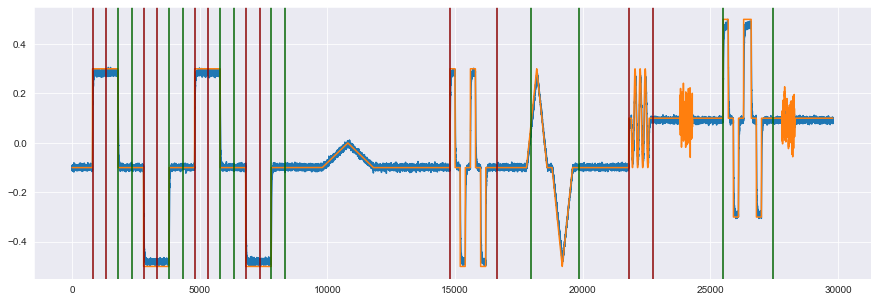

In [23]:
plt.figure(figsize=(15,5))
plt.plot(Y_clean);
plt.plot(X_clean[:,1]);

counter = 2;
for key, interval in EW.unified_intervals.items():
    if counter%2==0:
        color = 'darkred'
    else:
        color = 'darkgreen'
        
    plt.axvline(np.min(interval),color=color);
    plt.axvline(np.max(interval),color=color);
    
    counter+=1

#### Heatmap Analysis

#### forgetting_fact_u = forgetting_fact_v

In [19]:
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1]
H_v_grid = [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]

factor_grid, H_v_grid = np.meshgrid(factor_grid, H_v_grid)
num_intervals_mtx = np.zeros((factor_grid.shape[0],factor_grid.shape[1]))
len_intervals_mtx = np.zeros((factor_grid.shape[0],factor_grid.shape[1]))

counter = 0
for idx_1 in range(factor_grid.shape[0]):
    for idx_2 in range(factor_grid.shape[1]):
        
        counter+=1
        
        if counter%4==0:
            print("Iteration {}/{}".format(counter,factor_grid.shape[0]*factor_grid.shape[1]))
    
        forgetting_fact_v = factor_grid[idx_1,idx_2]
        forgetting_fact_u = factor_grid[idx_1,idx_2]
        H_v = [H_v_grid[idx_1,idx_2]]*2

        EW = ExponentialWeighted(forgetting_fact_v = forgetting_fact_v,
                                 forgetting_fact_u = forgetting_fact_u,
                                 H_v = H_v,
                                 verbose=0,
                                 n_jobs=-1)     
        
        intervals = EW.fit(X=df[['SP']],y=df[['Y']]);

        num_intervals_mtx[idx_1,idx_2] = len(intervals.keys())
        
        len_arr = []
        for key, value in intervals.items():
            len_arr.append(len(value))
            
        len_intervals_mtx[idx_1,idx_2] = np.mean(len_arr)
        
len_intervals_mtx = np.nan_to_num(len_intervals_mtx,0)

Iteration 4/90
Iteration 8/90
Iteration 12/90
Iteration 16/90
Iteration 20/90
Iteration 24/90
Iteration 28/90
Iteration 32/90
Iteration 36/90
Iteration 40/90
Iteration 44/90
Iteration 48/90
Iteration 52/90


/Users/giuliosanto/projects/Segments/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/Users/giuliosanto/projects/Segments/env/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Iteration 56/90
Iteration 60/90
Iteration 64/90
Iteration 68/90
Iteration 72/90
Iteration 76/90
Iteration 80/90
Iteration 84/90
Iteration 88/90


In [31]:
import plotly.graph_objects as go
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
H_v_grid = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]
fig = go.Figure(data =
    go.Contour(
        z=num_intervals_mtx,
        x=factor_grid, # horizontal axis
        y=H_v_grid, # vertical axis,
        zmin=0,
        zmax=30,
        colorscale='bugn',
                contours=dict(
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 26,
                color = 'black',
            )
    )))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title={'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title=r"$\Large \text{Variance Forgetting Factor }(\lambda_{S})$",
    yaxis_title=r"$\Large \text{Variance Threshold } (l_{S})$",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black"
    ),
)

fig.update_xaxes(range=[0, 0.015])
fig.update_yaxes(range=[0.001, 0.11])
fig.show()

In [33]:
import plotly.graph_objects as go
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
H_v_grid = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]
fig = go.Figure(data =
    go.Contour(
        z=len_intervals_mtx,
        x=factor_grid, # horizontal axis
        y=H_v_grid, # vertical axis,
        zmin=0,
        zmax=2000,
        colorscale='bugn',
                contours=dict(
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 26,
                color = 'black',
            )
    )))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title={'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title=r"$\Large \text{Variance Forgetting Factor }(\lambda_{S})$",
    yaxis_title=r"$\Large \text{Variance Threshold } (l_{S})$",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black"
    ),
)

fig.update_xaxes(range=[0, 0.015])
fig.update_yaxes(range=[0.001, 0.11])
fig.show()

#### forgetting_fact_u = 2*forgetting_fact_v

In [34]:
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1]
H_v_grid = [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]

factor_grid, H_v_grid = np.meshgrid(factor_grid, H_v_grid)
num_intervals_mtx = np.zeros((factor_grid.shape[0],factor_grid.shape[1]))

counter = 0
for idx_1 in range(factor_grid.shape[0]):
    for idx_2 in range(factor_grid.shape[1]):
        
        counter+=1
        
        if counter%4==0:
            print("Iteration {}/{}".format(counter,factor_grid.shape[0]*factor_grid.shape[1]))
    
        forgetting_fact_v = factor_grid[idx_1,idx_2]
        forgetting_fact_u = factor_grid[idx_1,idx_2]*2
        H_v = [H_v_grid[idx_1,idx_2]]*2

        EW = ExponentialWeighted(forgetting_fact_v = forgetting_fact_v,
                                 forgetting_fact_u = forgetting_fact_u,
                                 H_v = H_v,
                                 verbose=0,
                                 n_jobs=-1)     
        
        intervals = EW.fit(X=df[['SP']],y=df[['Y']]);

        num_intervals_mtx[idx_1,idx_2] = len(intervals.keys())
        
        len_arr = []
        for key, value in intervals.items():
            len_arr.append(len(value))
            
        len_intervals_mtx[idx_1,idx_2] = np.mean(len_arr)
        
len_intervals_mtx = np.nan_to_num(len_intervals_mtx,0)

Iteration 4/90
Iteration 8/90
Iteration 12/90
Iteration 16/90
Iteration 20/90
Iteration 24/90
Iteration 28/90
Iteration 32/90
Iteration 36/90
Iteration 40/90
Iteration 44/90
Iteration 48/90
Iteration 52/90
Iteration 56/90
Iteration 60/90
Iteration 64/90
Iteration 68/90
Iteration 72/90
Iteration 76/90
Iteration 80/90
Iteration 84/90
Iteration 88/90


In [35]:
import plotly.graph_objects as go
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
H_v_grid = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]
fig = go.Figure(data =
    go.Contour(
        z=num_intervals_mtx,
        x=factor_grid, # horizontal axis
        y=H_v_grid, # vertical axis,
        zmin=0,
        zmax=30,
        colorscale='bugn',
                contours=dict(
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 26,
                color = 'black',
            )
    )))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title={'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title=r"$\Large \text{Variance Forgetting Factor }(\lambda_{S})$",
    yaxis_title=r"$\Large \text{Variance Threshold } (l_{S})$",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black"
    ),
)

fig.update_xaxes(range=[0, 0.015])
fig.update_yaxes(range=[0.001, 0.11])
fig.show()

In [37]:
import plotly.graph_objects as go
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
H_v_grid = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]
fig = go.Figure(data =
    go.Contour(
        z=len_intervals_mtx,
        x=factor_grid, # horizontal axis
        y=H_v_grid, # vertical axis,
        zmin=0,
        zmax=2000,
        colorscale='bugn',
                contours=dict(
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 26,
                color = 'black',
            )
    )))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title={'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title=r"$\Large \text{Variance Forgetting Factor }(\lambda_{S})$",
    yaxis_title=r"$\Large \text{Variance Threshold } (l_{S})$",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black"
    ),
)

fig.update_xaxes(range=[0, 0.015])
fig.update_yaxes(range=[0.001, 0.11])
fig.show()

#### forgetting_fact_u = 0.5*forgetting_fact_v

In [38]:
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1]
H_v_grid = [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]

factor_grid, H_v_grid = np.meshgrid(factor_grid, H_v_grid)
num_intervals_mtx = np.zeros((factor_grid.shape[0],factor_grid.shape[1]))
len_intervals_mtx = np.zeros((factor_grid.shape[0],factor_grid.shape[1]))

counter = 0
for idx_1 in range(factor_grid.shape[0]):
    for idx_2 in range(factor_grid.shape[1]):
        
        counter+=1
        
        if counter%4==0:
            print("Iteration {}/{}".format(counter,factor_grid.shape[0]*factor_grid.shape[1]))
    
        forgetting_fact_v = factor_grid[idx_1,idx_2]
        forgetting_fact_u = factor_grid[idx_1,idx_2]*0.5
        H_v = [H_v_grid[idx_1,idx_2]]*2

        EW = ExponentialWeighted(forgetting_fact_v = forgetting_fact_v,
                                 forgetting_fact_u = forgetting_fact_u,
                                 H_v = H_v,
                                 verbose=0,
                                 n_jobs=-1)     
        
        intervals = EW.fit(X=df[['SP']],y=df[['Y']]);

        num_intervals_mtx[idx_1,idx_2] = len(intervals.keys())
        
        len_arr = []
        for key, value in intervals.items():
            len_arr.append(len(value))
            
        len_intervals_mtx[idx_1,idx_2] = np.mean(len_arr)
        
len_intervals_mtx = np.nan_to_num(len_intervals_mtx,0)

Iteration 4/90
Iteration 8/90
Iteration 12/90
Iteration 16/90
Iteration 20/90
Iteration 24/90
Iteration 28/90
Iteration 32/90
Iteration 36/90
Iteration 40/90
Iteration 44/90
Iteration 48/90
Iteration 52/90
Iteration 56/90
Iteration 60/90
Iteration 64/90
Iteration 68/90
Iteration 72/90
Iteration 76/90
Iteration 80/90
Iteration 84/90
Iteration 88/90


In [39]:
import plotly.graph_objects as go
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
H_v_grid = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]
fig = go.Figure(data =
    go.Contour(
        z=num_intervals_mtx,
        x=factor_grid, # horizontal axis
        y=H_v_grid, # vertical axis,
        zmin=0,
        zmax=30,
        colorscale='bugn',
                contours=dict(
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 26,
                color = 'black',
            )
    )))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title={'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title=r"$\Large \text{Variance Forgetting Factor }(\lambda_{S})$",
    yaxis_title=r"$\Large \text{Variance Threshold } (l_{S})$",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black"
    ),
)

fig.update_xaxes(range=[0, 0.015])
fig.update_yaxes(range=[0.001, 0.11])
fig.show()

In [40]:
import plotly.graph_objects as go
factor_grid = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
H_v_grid = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]
fig = go.Figure(data =
    go.Contour(
        z=len_intervals_mtx,
        x=factor_grid, # horizontal axis
        y=H_v_grid, # vertical axis,
        zmin=0,
        zmax=2000,
        colorscale='bugn',
                contours=dict(
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 26,
                color = 'black',
            )
    )))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title={'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title=r"$\Large \text{Variance Forgetting Factor }(\lambda_{S})$",
    yaxis_title=r"$\Large \text{Variance Threshold } (l_{S})$",
    font=dict(
        family="Times New Roman",
        size=22,
        color="black"
    ),
)

fig.update_xaxes(range=[0, 0.015])
fig.update_yaxes(range=[0.001, 0.11])
fig.show()

#### 2) Pettitt Change-point Method

In [56]:
PM = PettittMethod(alpha=0.05,
                   min_length_to_split=1200,
                   verbose=0,
                   n_jobs=1)

In [57]:
pm_initial_segments = PM.fit(X=sp,
                             y=y)

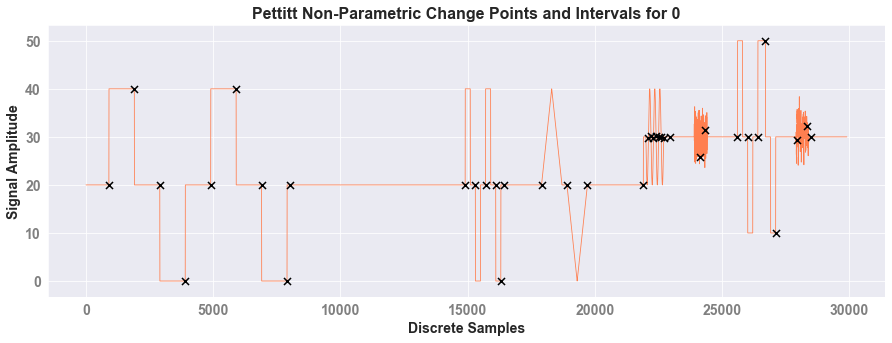

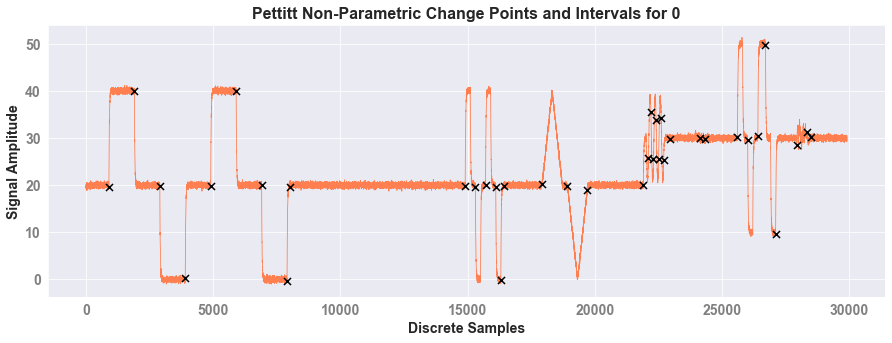

In [58]:
PM.plot_change_points(X=sp,y=y)

#### 3) Bandpass Filter

In [229]:
BP = BandpassFilter(
       X=pd.DataFrame(df),
       W=[0.006, 0.04],
       H=[0.02]*2,
       N=1
    )

In [230]:
BP.fit();

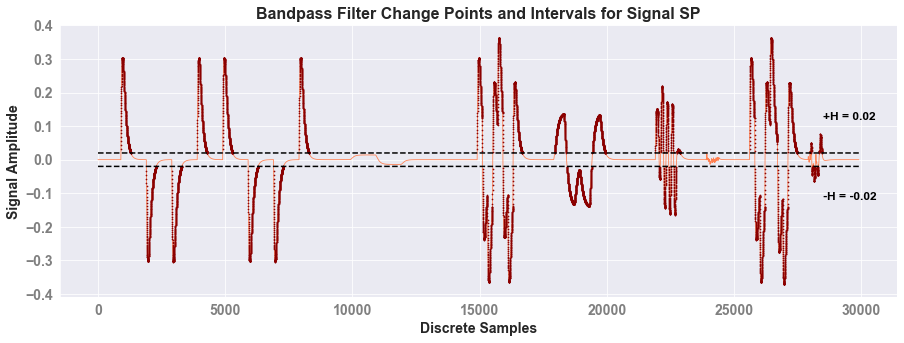

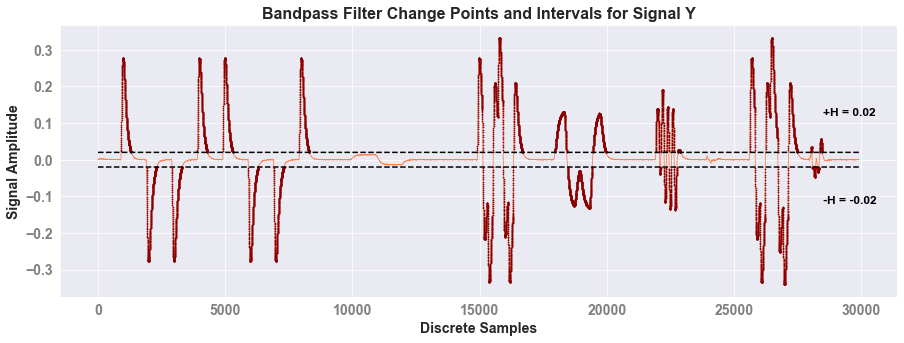

In [231]:
BP.plot_change_points()

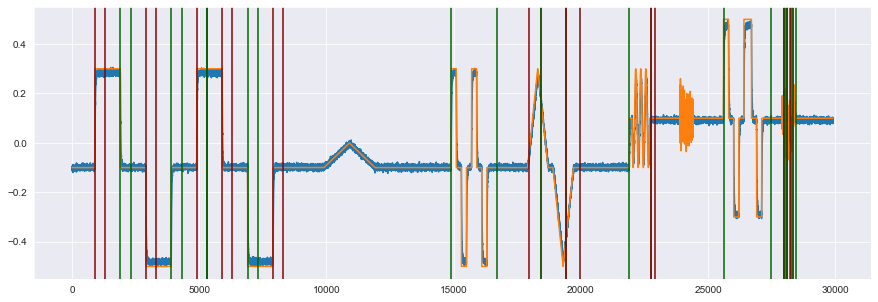

In [232]:
plt.figure(figsize=(15,5))
plt.plot(Y_clean);
plt.plot(X_clean[:,1]);

counter = 2;
for key, interval in BP.unified_intervals.items():
    if counter%2==0:
        color = 'darkred'
    else:
        color = 'darkgreen'
        
    plt.axvline(np.min(interval),color=color);
    plt.axvline(np.max(interval),color=color);
    
    counter+=1